<a href="https://colab.research.google.com/github/simonscmap/Workshops/blob/master/ADM_May2021/DepthProfile.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
<a href="https://mybinder.org/v2/gh/simonscmap/Workshops/master?filepath=ADM_May2021%2FDepthProfile.ipynb"><img align="right" src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" title="Open and Execute in Binder"></a>

## *depth_profile(table, variable, dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2)*

Returns a subset of data according to the specified space-time constraints (dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2). The returned data subset is aggregated by depth: at each depth level the mean and standard deviation of the variable values within the space-time constraints are computed. The sequence of these values construct the depth profile. The resulted depth profile is returned in form of a Pandas datframe sorted by depth.

> **Parameters:** 
>> **table: string**
>>  <br />Table name (each dataset is stored in a table). A full list of table names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**variable: string**
>>  <br />Variable short name which directly corresponds to a field name in the table. A subset of this variable is returned by this method according to the spatio-temporal cut parameters (below). A full list of variable short names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**dt1: string**
>>  <br />Start date or datetime. This parameter sets the lower bound of the temporal cut. <br />Example values: '2016-05-25' or '2017-12-10 17:25:00'
>> <br />
>> <br />**dt2: string**
>>  <br />End date or datetime. This parameter sets the upper bound of the temporal cut. 
>> <br />
>> <br />**lat1: float**
>>  <br />Start latitude [degree N]. This parameter sets the lower bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lat2: float**
>>  <br />End latitude [degree N]. This parameter sets the upper bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lon1: float**
>>  <br />Start longitude [degree E]. This parameter sets the lower bound of the zonal cut. Note latitude ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**lon2: float**
>>  <br />End longitude [degree E]. This parameter sets the upper bound of the zonal cut. Note latitude ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**depth1: float**
>>  <br />Start depth [m]. This parameter sets the lower bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**depth2: float**
>>  <br />End depth [m]. This parameter sets the upper bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).


>**Returns:** 
>>  Pandas dataframe.


### Example 

This example retrieves depth profile of in-situ chlorophyll concentration measurements by [Argo Floats](https://simonscmap.com/catalog/datasets/Argo_BGC_REP). The last few lines of code (lines 26-30) creates a simple plot showing the chlorophyll depth profile (deep chlorophyll maximum near 100 m).

In [ ]:
!pip install pycmap     #install pycmap and its dependencies

Deep Chlorophyll Maximum (DCM) level: 101.50 [m]


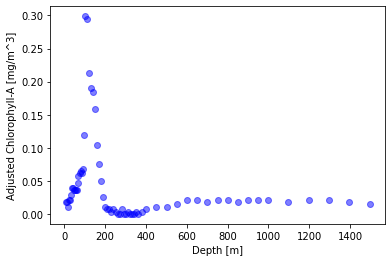

In [1]:
import matplotlib.pyplot as plt
import pycmap

api = pycmap.API(token='public')
table, variable = 'tblArgoMerge_REP', 'argo_merge_chl_adj'
df = api.depth_profile(
                      table=table, 
                      variable=variable, 
                      dt1='2016-04-30', 
                      dt2='2016-04-30', 
                      lat1=20, 
                      lat2=24, 
                      lon1=-170, 
                      lon2=-150, 
                      depth1=0, 
                      depth2=1500
                      ) 


DCM = df['depth'].iloc[df['argo_merge_chl_adj'].idxmax()]
print(f"Deep Chlorophyll Maximum (DCM) level: {DCM:2.2f} [m]")


# Create a simple plot

%matplotlib inline
plt.plot(df['depth'], df[variable], 'ob', alpha=0.5)
plt.xlabel('Depth [m]')
plt.ylabel(api.get_var_long_name(table, variable) + api.get_unit(table, variable))
plt.show()